# 프로젝트 : Telco Customer Churn 고객 유지를 위한 행동 예측(이탈 방지)

In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('/content/Mydrive/MyDrive/datascience/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Column 해석

customerID : 고객 id

gender : 성별

SeniorCitizen : 고령자(yes:1, no:0)

Partner : 파트너

Dependents : 부양 가족

tenure : 보유(고객이 머물렀던 개월 수)

PhoneService : 휴대폰 서비스

MultipleLines : 여러회선 여부( 예, 아니오, 전화 서비스 없음)

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

OnlineSecurity : 온라인 보안 여부(예, 아니오, 전화서비스 없음)

OnlineBackup : 온라인 백업 여부(예, 아니오, 전화서비스 없음)

DeviceProtection : 장치보호 여부(예, 아니요, 인터넷 서비스 없음)

TechSupport : 기술지원 여부(예, 아니요, 인터넷 서비스 없음)

StreamingTV : StreamingTV보유 여부(예, 아니요, 인터넷 서비스 없음)

StreamingMovies : 스트리밍 영화 보유 여부(예, 아니요, 인터넷 서비스 없음)

Contract : 계약(계약기간 월간, 1년, 2년)

PaperlessBilling : 종이없는 결제(예, 아니요)

PaymentMethod : 고객의 결제 수단 (전자 수표, 우편 수표, 은행 송금 (자동), 신용 카드 (자동))

MonthlyCharges : 월간 요금

TotalCharges : 총 요금

Churn : 지난달 퇴사한 고객객

# 데이터 확인하기

In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


먼저 이탈한 고객의 옵션들을 살펴보자

In [8]:
Chdata = data.loc[data['Churn']=='Yes']
Chdata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


## **가설1)** 단기계약일수록 이탈할 가능성이 높지 않을까?

In [9]:
pd.crosstab(data.Contract, data.Churn,normalize=True)

Churn,No,Yes
Contract,,
Month-to-month,0.315207,0.234985
One year,0.185574,0.023570
Two year,0.233849,0.006815


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


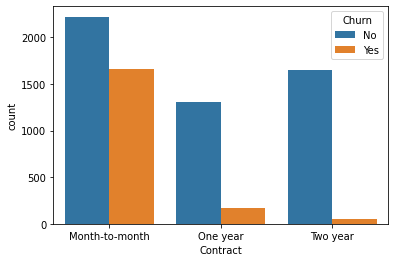

In [10]:
sns.countplot(data.Contract, hue = data.Churn)

월별 계약일수록 이탈가능성이 높으며 장기계약인 2년계약시 가장 이탈율이 낮다

- 인사이트 :  **장기 계약 고객으로 만들수록 이탈율을 줄일 수 있다.**

## 가설2) 오래 유지한 고객일 수록 이탈이 적지 않을까?

In [11]:
data['tenure'].min()

0

In [12]:
data['tenure'].max()

72

In [13]:
data['tenure'] = pd.cut(data['tenure'],5)
data['tenure'].unique()

[(-0.072, 14.4], (28.8, 43.2], (43.2, 57.6], (14.4, 28.8], (57.6, 72.0]]
Categories (5, interval[float64]): [(-0.072, 14.4] < (14.4, 28.8] < (28.8, 43.2] < (43.2, 57.6] <
                                    (57.6, 72.0]]

In [14]:
pd.crosstab(data.tenure, data.Churn,margins=True)

Churn,No,Yes,All
tenure,,,
"(-0.072, 14.4]",1272,1099,2371
"(14.4, 28.8]",831,295,1126
"(28.8, 43.2]",774,215,989
"(43.2, 57.6]",805,142,947
"(57.6, 72.0]",1492,118,1610
All,5174,1869,7043


In [15]:
pd.crosstab(data.tenure, data.Churn, normalize=True)

Churn,No,Yes
tenure,,
"(-0.072, 14.4]",0.180605,0.156041
"(14.4, 28.8]",0.117989,0.041886
"(28.8, 43.2]",0.109896,0.030527
"(43.2, 57.6]",0.114298,0.020162
"(57.6, 72.0]",0.211842,0.016754


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


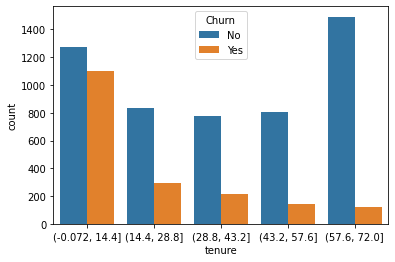

In [16]:
sns.countplot(data.tenure, hue = data.Churn)

장기간 이용할 수록 이탈하는 고객들이 줄어든다
- 인사이트 : **대략 15개월 이상으로 고객을 유지시킨다면 이탈률을 크게 낮출 수 있으므로 초반 가입 고객들에게 오래유지할 수 있는 서비스를 기획하거나 15개월 이상 이용한 고객의 특징을 살펴본후 대입해 본다.**

## 성별에 따른 이탈차이도 있을까?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


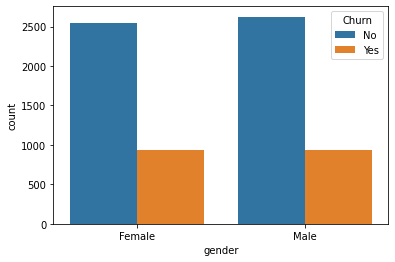

In [17]:
sns.countplot(data.gender, hue = data.Churn)

성별에 따른 인사이트는 얻기 힘들어 보인다.

## 고령자와 이탈에는 어떤 관계가 있을까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


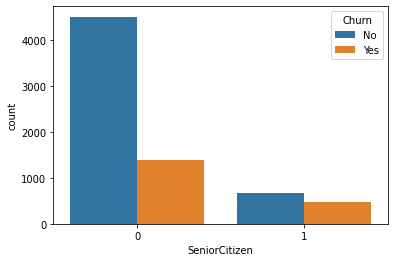

In [18]:
sns.countplot(data.SeniorCitizen, hue = data.Churn)
# 비고령자 = 0 , 고령자 = 1

In [19]:
pd.crosstab(data.SeniorCitizen, data.Churn, margins= True, normalize=True)

Churn,No,Yes,All
SeniorCitizen,,,
0,0.640068,0.197785,0.837853
1,0.094562,0.067585,0.162147
All,0.734630,0.265370,1.000000


- 인사이트 : **고령자 고객분들이 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획하여야 한다. 향후 상대적으로 저연령층 고객들이 고령자가 되었을때 이탈 방지를 위함**




## 파트너 혹은 부양가족에 따른 이탈률을 알아보자


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dependents and Churn correlation')

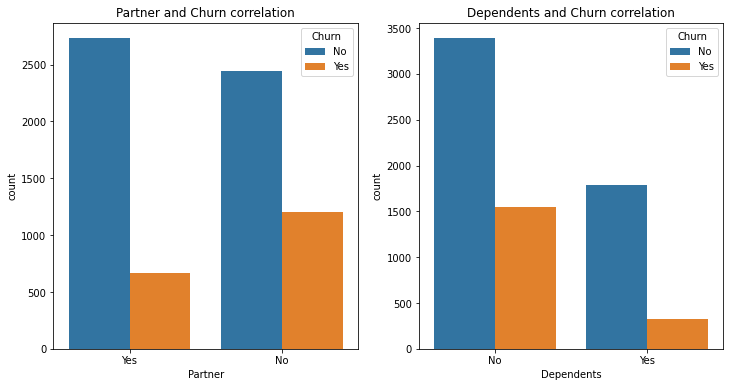

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.countplot(data.Partner, hue = data.Churn, ax = ax[0])
ax[0].set_title('Partner and Churn correlation')
sns.countplot(data.Dependents, hue =data.Churn, ax = ax[1])
ax[1].set_title('Dependents and Churn correlation')

왜 파트너 혹은 부양가족이 없으면 더 많은 이탈이 일어날까?

## 가설3) 파트너 혹은 부양가족이 있으면 이탈율이 적은데 서비스측면에서 부가적인 혜택이 있는가?

이를 알아보기 위해 먼저 요금을 확인해 보자

In [21]:
data['MonthlyCharges'].nunique()

1585

In [22]:
data['MonthlyCharges'].min()

18.25

In [23]:
data['MonthlyCharges'].max()

118.75

In [24]:
data['MonthlyCharges'] = pd.cut(data['MonthlyCharges'], 6)
data['MonthlyCharges'].unique()

[(18.15, 35.0], (51.75, 68.5], (35.0, 51.75], (68.5, 85.25], (85.25, 102.0], (102.0, 118.75]]
Categories (6, interval[float64]): [(18.15, 35.0] < (35.0, 51.75] < (51.75, 68.5] < (68.5, 85.25] <
                                    (85.25, 102.0] < (102.0, 118.75]]

어떻게 해야 파트너 혹은 부양가족이 있는 유저들이 그렇지 않은 유저와 요금을 통해 비교해 볼 수 있을까?

In [25]:
#a = data.loc[(data['Partner'] == 'Yes') & (data['Dependents'] == 'Yes'),'MonthlyCharges']
#b = data.loc[data['Partner'] == 'Yes','MonthlyCharges']
#c = data.loc[data['Dependents'] == 'Yes', :]
d = data.loc[data['Partner'] == 'Yes','Partner']
e = data.loc[data['Partner'] == 'No','Partner']
#pd.crosstab(d, data.MonthlyCharges,margins=True)
pd.crosstab(e, data.MonthlyCharges,margins=True)


MonthlyCharges,"(18.15, 35.0]","(35.0, 51.75]","(51.75, 68.5]","(68.5, 85.25]","(85.25, 102.0]","(102.0, 118.75]",All
Partner,,,,,,,
No,925,468,425,900,666,257,3641
All,925,468,425,900,666,257,3641


In [26]:
pd.crosstab(d, data.MonthlyCharges,margins=True)

MonthlyCharges,"(18.15, 35.0]","(35.0, 51.75]","(51.75, 68.5]","(68.5, 85.25]","(85.25, 102.0]","(102.0, 118.75]",All
Partner,,,,,,,
Yes,810,248,400,714,762,468,3402
All,810,248,400,714,762,468,3402


주어진 정보만으로 알기 힘들것 같다.

인터넷서비스
- 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies 의 수치를 확인하면 No internet service 에서 똑같은 수치를 확인할 수 있다 
- 인사이트 : 인터넷 서비스에 (온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies) 이 포함된다


In [27]:
pd.crosstab(data.Partner, data.StreamingTV, normalize= True)

StreamingTV,No,No internet service,Yes
Partner,,,
No,0.236689,0.111884,0.168394
Yes,0.162289,0.104785,0.215959


In [28]:
pd.crosstab(data.Partner, data.StreamingMovies, normalize= True)

StreamingMovies,No,No internet service,Yes
Partner,,,
No,0.233139,0.111884,0.171944
Yes,0.162289,0.104785,0.215959


In [29]:
pd.crosstab(data.Partner, data.OnlineBackup , normalize= True)

OnlineBackup,No,No internet service,Yes
Partner,,,
No,0.260400,0.111884,0.144683
Yes,0.178049,0.104785,0.200199


In [30]:
pd.crosstab(data.Partner, data.OnlineSecurity  , normalize= True)

OnlineSecurity,No,No internet service,Yes
Partner,,,
No,0.289223,0.111884,0.115860
Yes,0.207440,0.104785,0.170808


In [31]:
pd.crosstab(data.Partner, data.TechSupport  , normalize= True)

TechSupport,No,No internet service,Yes
Partner,,,
No,0.282266,0.111884,0.122817
Yes,0.210848,0.104785,0.167400


In [32]:
pd.crosstab(data.Partner, data.DeviceProtection  , normalize= True)

DeviceProtection,No,No internet service,Yes
Partner,,,
No,0.263808,0.111884,0.141275
Yes,0.175635,0.104785,0.202613


In [33]:
pd.crosstab(data.Partner, data.InternetService  , normalize= True)

InternetService,DSL,Fiber optic,No
Partner,,,
No,0.177907,0.227176,0.111884
Yes,0.165838,0.212409,0.104785


폰 서비스
- 폰서비스에 MultipleLines 이 포함된다. 

In [34]:
pd.crosstab(data.Partner, data.PhoneService    , normalize= True)

PhoneService,No,Yes
Partner,,
No,0.052676,0.464291
Yes,0.044157,0.438875


In [35]:
pd.crosstab(data.Partner, data.MultipleLines    , normalize= True)


MultipleLines,No,No phone service,Yes
Partner,,,
No,0.281272,0.052676,0.183019
Yes,0.200057,0.044157,0.238819


인사이트 
- 인터넷 서비스를 사용하지않으면 다음 서비스( 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies)를 같이 이용하지 않음을 보아 인터넷 서비스에 포함되는 내용인것으로 추측해 볼 수 있다. 
- MultipleLines 즉, 여러회선 여부는 폰서비스에 해당한다.

# 정리


- 장기계약을 한 고객일 수록 이탈률을 줄일 수 있다. 
- 15개월 이상 연속으로 사용하게 되면 이탈률을 줄일 수 있다.
- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다, 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함
- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 이유는 무엇일까?

# 인코딩

 - No  = 0
 - Yes = 1
 - No phone service = 2
 - No internet service = 3

In [36]:
#더 간단한 코드 없을까?
mapping = {'No': 0, 
           'Yes': 1,
           'No phone service': 2,
           'No internet service' : 3}

data['Partner'] = data['Partner'].map(mapping)
data['Dependents'] = data['Dependents'].map(mapping)
data['PhoneService'] = data['PhoneService'].map(mapping)
data['MultipleLines'] = data['MultipleLines'].map(mapping)
data['OnlineSecurity'] = data['OnlineSecurity'].map(mapping)
data['OnlineBackup'] = data['OnlineBackup'].map(mapping)
data['DeviceProtection'] = data['DeviceProtection'].map(mapping)
data['TechSupport'] = data['TechSupport'].map(mapping)
data['StreamingTV'] = data['StreamingTV'].map(mapping)
data['StreamingMovies'] = data['StreamingMovies'].map(mapping)
data['PaperlessBilling'] = data['PaperlessBilling'].map(mapping)
data['Churn'] = data['Churn'].map(mapping) 

In [37]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,"(-0.072, 14.4]",0,2,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,"(18.15, 35.0]",29.85,0
1,5575-GNVDE,Male,0,0,0,"(28.8, 43.2]",1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,"(51.75, 68.5]",1889.5,0
2,3668-QPYBK,Male,0,0,0,"(-0.072, 14.4]",1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,"(51.75, 68.5]",108.15,1
3,7795-CFOCW,Male,0,0,0,"(43.2, 57.6]",0,2,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),"(35.0, 51.75]",1840.75,0
4,9237-HQITU,Female,0,0,0,"(-0.072, 14.4]",1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,"(68.5, 85.25]",151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,"(14.4, 28.8]",1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,"(68.5, 85.25]",1990.5,0
7039,2234-XADUH,Female,0,1,1,"(57.6, 72.0]",1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),"(102.0, 118.75]",7362.9,0
7040,4801-JZAZL,Female,0,1,1,"(-0.072, 14.4]",0,2,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,"(18.15, 35.0]",346.45,0
7041,8361-LTMKD,Male,1,1,0,"(-0.072, 14.4]",1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,"(68.5, 85.25]",306.6,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   tenure            7043 non-null   category
 6   PhoneService      7043 non-null   int64   
 7   MultipleLines     7043 non-null   int64   
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   int64   
 10  OnlineBackup      7043 non-null   int64   
 11  DeviceProtection  7043 non-null   int64   
 12  TechSupport       7043 non-null   int64   
 13  StreamingTV       7043 non-null   int64   
 14  StreamingMovies   7043 non-null   int64   
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

# 고객유지 프로그램 모델 생성